
wn
<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Potential Use Cases</h2>
  <ul>
    <li><strong>Regression Modeling:</strong> Predict motor_UPDRS and total_UPDRS using the provided voice measurements.</li>
    <li><strong>Feature Analysis:</strong> Explore the relationship between features like Jitter, Shimmer, NHR, HNR, and their contribution to UPDRS scores.</li>
    <li><strong>Classification:</strong> Determine patterns in voice measurements to classify subjects by severity or progression stage.</li>
    <li><strong>Time-Series Analysis:</strong> Use test_time to analyze the progression of Parkinson’s symptoms over time for each subject.</li>
    <li><strong>Healthcare Insights:</strong> Identify critical vocal attributes that are strong indicators of Parkinson's disease progression.</li>
  </ul>

  <h2 style="text-align: center; color: #333366;">Key Steps in Data Analysis</h2>
  <ul>
    <li><strong>Exploratory Data Analysis (EDA):</strong> Summarize the dataset, checking for missing values and outliers. Visualize relationships between features using correlation heatmaps, scatter plots, and pair plots.</li>
    <li><strong>Data Preprocessing:</strong> Handle missing values and outliers appropriately. Normalize or standardize continuous variables like Jitter, Shimmer, etc.</li>
    <li><strong>Feature Engineering:</strong> Extract meaningful features or combinations of variables to improve model performance.</li>
    <li><strong>Model Selection:</strong> Implement linear and non-linear regression models for UPDRS prediction (e.g., Linear Regression, Random Forest, Gradient Boosting). Compare classification algorithms if targeting specific stages of progression (e.g., Logistic Regression, SVM, Neural Networks).</li>
    <li><strong>Model Evaluation:</strong> Evaluate using metrics such as RMSE or MAE for regression tasks, and accuracy, precision, recall, and F1-score for classification tasks. Use cross-validation to ensure robustness.</li>
    <li><strong>Longitudinal Analysis:</strong> Analyze trends over time for individual subjects to better understand disease progression.</li>
  </ul>

  <h2 style="text-align: center; color: #333366;">Technical Tips</h2>
  <ul>
    <li>Correlation Analysis: Given the high dimensionality (16 biomedical measures), identify multicollinear variables to avoid redundancy.</li>
    <li>Non-Linear Patterns: Explore non-linear relationships between voice features and UPDRS scores using tools like polynomial regression or feature transformations.</li>
    <li>Feature Importance: Use methods like SHAP or feature permutation to interpret the importance of different voice measurements.</li>
  </ul>

  <h2 style="text-align: center; color: #333366;">Tools for Analysis</h2>
  <ul>
    <li><strong>Python Libraries:</strong></li>
    <li>Data Analysis: pandas, numpy</li>
    <li>Visualization: matplotlib, seaborn</li>
    <li>Machine Learning: scikit-learn, xgboost, lightgbm</li>
    <li><strong>Jupyter Notebooks/Kaggle Notebooks:</strong> For interactive experimentation.</li>
    <li><strong>AutoML Tools:</strong> Tools like H2O AutoML can provide baseline models fbes, technical tips, and tools for analysis.

## <h2 style="text-align: center; color: #4c4cff;">👨‍💻 About the Author</h2>

**Name**: Arif Miah  

🎓 **Profession**: Machine Learning Engineer  

🔍 I am a passionate **Machine Learning Engineer** with expertise in building real-world solutions using **Machine Learning, Deep Learning, Computer Vision**, and **Data Science**. I love turning data into meaningful insights and solving complex challenges using cutting-edge technologies.  

💻 **Skills**:
- Machine Learning & Deep Learning  
- Natural Language Processing (NLP)  
- Computer Vision & Data Analysis  
- Python Programming  
- Model Deployment  

---

### 🌐 Connect with Me  

📧 **Email**: [arifmiahcse@gmail.com](mailto:arifmiahcse@gmail.com)  

🔗 **LinkedIn**: [LinkedIn Profile](https://www.linkedin.com/in/arif-miah)  

🐱 **GitHub**: [GitHub Profile](https://github.com/Arif-miad)  

📝 **Kaggle**: [Kaggle Profile](https://www.kaggle.com/arifmia)  

---


## <h2 style="text-align: center; color: #4c4cff;">👨‍💻 Load libraries</h2>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd 
import numpy as np 

import warnings
warnings.filterwarnings("ignore")

## <h2 style="text-align: center; color: #4c4cff;">👨‍💻 Data Load</h2>

In [3]:
df = pd.read_csv("/kaggle/input/parkinsons-telemonitoring/Parkinsons-Telemonitoring-ucirvine.csv")

In [4]:
df.head()

,subject,age,sex,test_time,motor_updrs,total_updrs,jitter,jitter_abs,jitter_rap,jitter_ppq5,...,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,nhr,hnr,rpde,dfa,ppe
0,1,72,False,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,False,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,False,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,False,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,False,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [5]:
df.tail()

,subject,age,sex,test_time,motor_updrs,total_updrs,jitter,jitter_abs,jitter_rap,jitter_ppq5,...,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,nhr,hnr,rpde,dfa,ppe
5870,42,61,False,142.79,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,False,149.84,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,False,156.82,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,False,163.73,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204
5874,42,61,False,170.73,20.513,31.513,0.00282,0.000021,0.00135,0.00166,...,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.15336


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject        5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   bool   
 3   test_time      5875 non-null   float64
 4   motor_updrs    5875 non-null   float64
 5   total_updrs    5875 non-null   float64
 6   jitter         5875 non-null   float64
 7   jitter_abs     5875 non-null   float64
 8   jitter_rap     5875 non-null   float64
 9   jitter_ppq5    5875 non-null   float64
 10  jitter_ddp     5875 non-null   float64
 11  shimmer        5875 non-null   float64
 12  shimmer_db     5875 non-null   float64
 13  shimmer_apq3   5875 non-null   float64
 14  shimmer_apq5   5875 non-null   float64
 15  shimmer_apq11  5875 non-null   float64
 16  shimmer_dda    5875 non-null   float64
 17  nhr            5875 non-null   float64
 18  hnr     

In [7]:
df.describe()

,subject,age,test_time,motor_updrs,total_updrs,jitter,jitter_abs,jitter_rap,jitter_ppq5,jitter_ddp,...,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,nhr,hnr,rpde,dfa,ppe
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [8]:
df.shape

(5875, 22)

In [10]:
df.isnull().sum()

subject          0
age              0
sex              0
test_time        0
motor_updrs      0
total_updrs      0
jitter           0
jitter_abs       0
jitter_rap       0
jitter_ppq5      0
jitter_ddp       0
shimmer          0
shimmer_db       0
shimmer_apq3     0
shimmer_apq5     0
shimmer_apq11    0
shimmer_dda      0
nhr              0
hnr              0
rpde             0
dfa              0
ppe              0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df

,subject,age,sex,test_time,motor_updrs,total_updrs,jitter,jitter_abs,jitter_rap,jitter_ppq5,...,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,nhr,hnr,rpde,dfa,ppe
0,1,72,False,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,False,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,False,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,False,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,False,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,False,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,False,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,False,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,False,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


## <h2 style="text-align: center; color: #4c4cff;">👨‍💻 Exploratory data analysis</h2>

Text(0.5, 1.0, 'Distribution of Motor UPDRS')

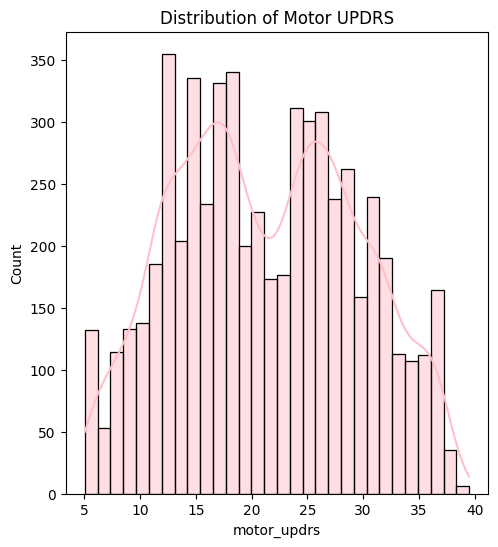

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['motor_updrs'], kde=True, bins=30, color='Pink')
plt.title('Distribution of Motor UPDRS')

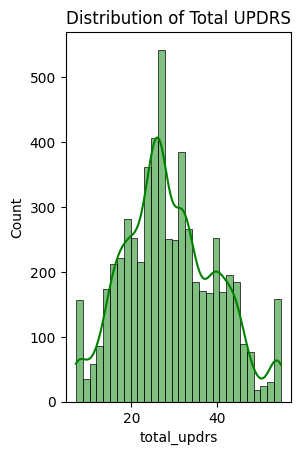

In [18]:
plt.subplot(1, 2, 2)
sns.histplot(df['total_updrs'], kde=True, bins=30, color='green')
plt.title('Distribution of Total UPDRS')
plt.show()

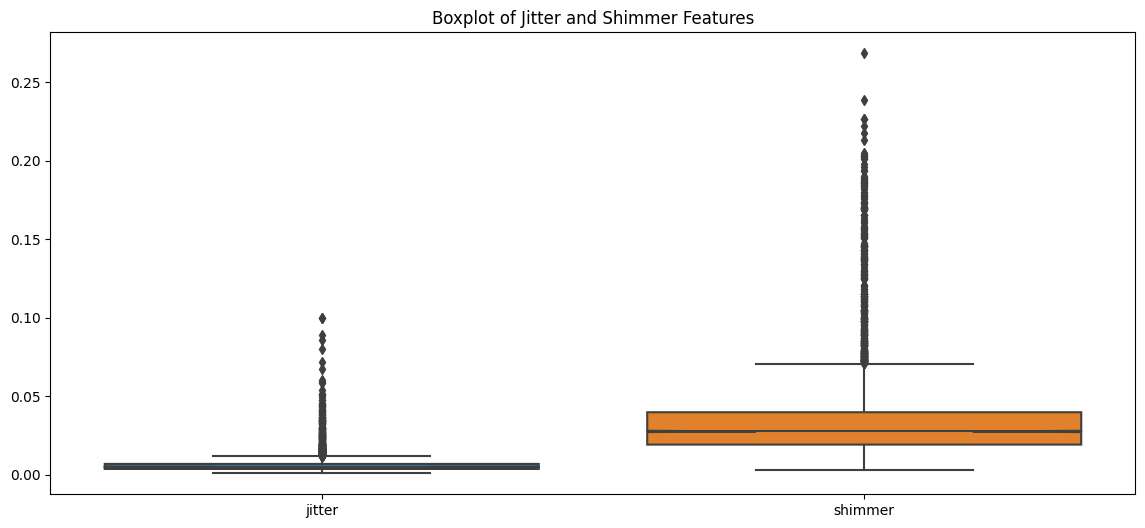

In [20]:
# Visualize distribution of jitter and shimmer features
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[['jitter', 'shimmer']], notch=True)
plt.title('Boxplot of Jitter and Shimmer Features')
plt.show()

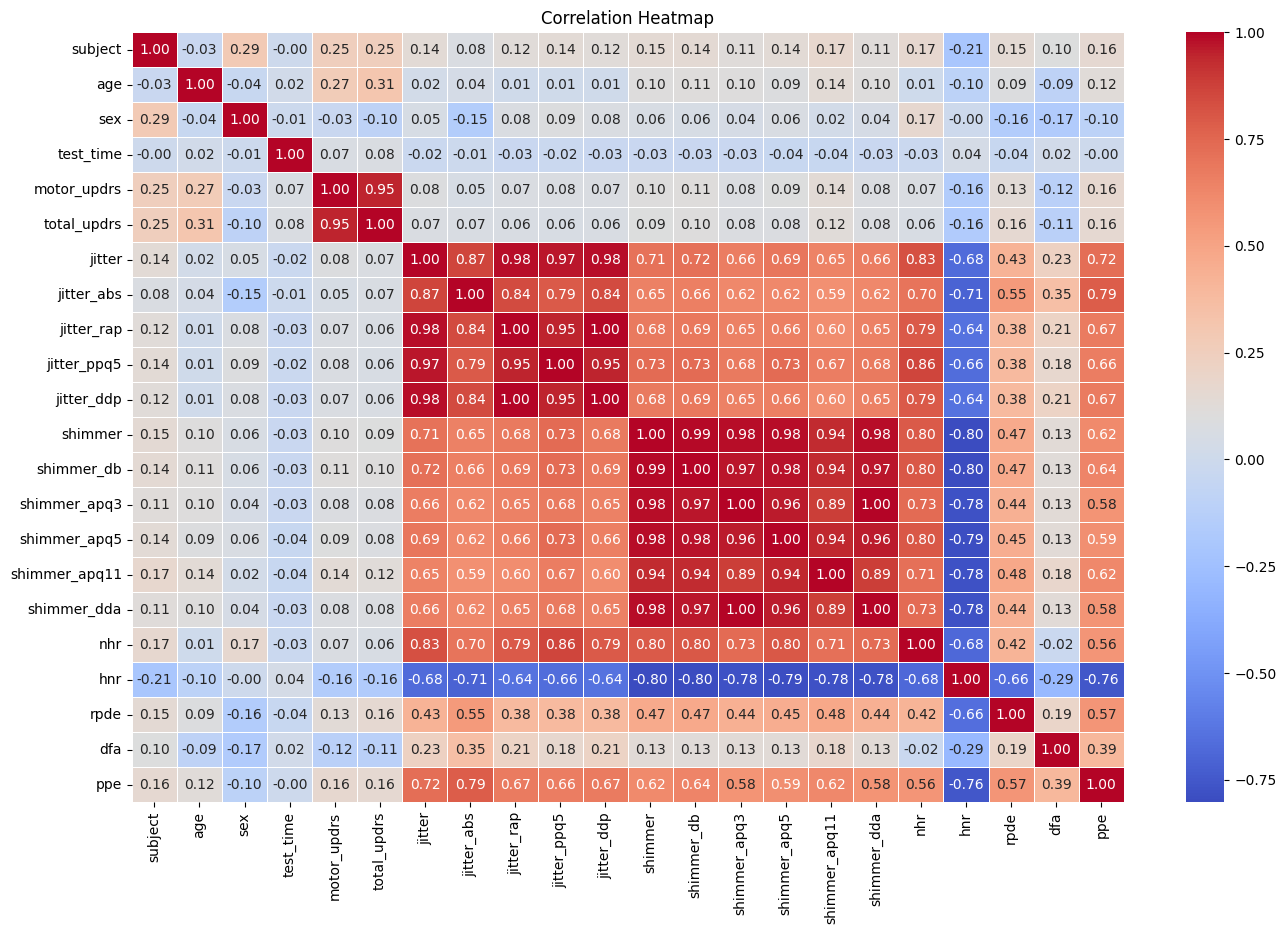

In [21]:
# Correlation heatmap
plt.figure(figsize=(16, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

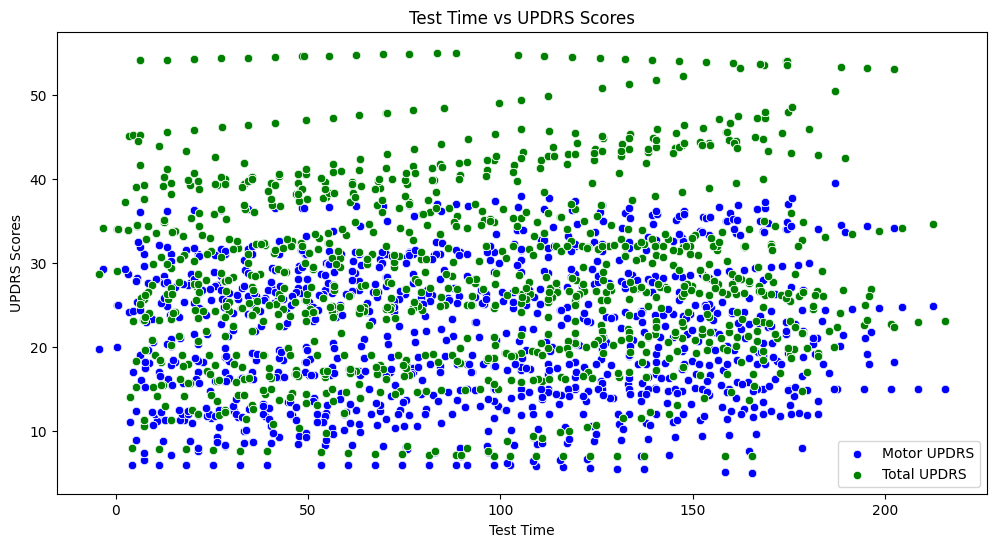

In [22]:
# Scatter plot of 'test_time' vs 'motor_updrs' and 'total_updrs'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='test_time', y='motor_updrs', label='Motor UPDRS', color='blue')
sns.scatterplot(data=df, x='test_time', y='total_updrs', label='Total UPDRS', color='green')
plt.title('Test Time vs UPDRS Scores')
plt.xlabel('Test Time')
plt.ylabel('UPDRS Scores')
plt.legend()
plt.show()


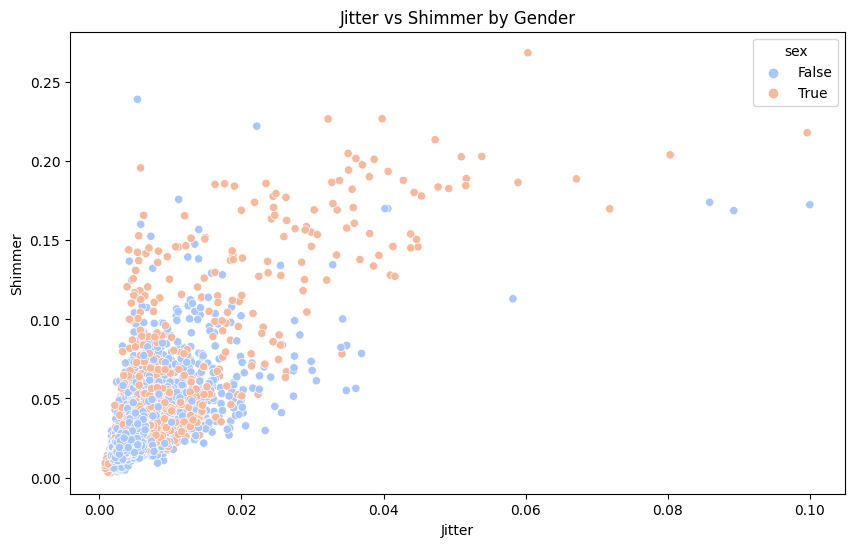

In [23]:
# Analyze the relationship between jitter and shimmer
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='jitter', y='shimmer', hue='sex', palette='coolwarm')
plt.title('Jitter vs Shimmer by Gender')
plt.xlabel('Jitter')
plt.ylabel('Shimmer')
plt.show()

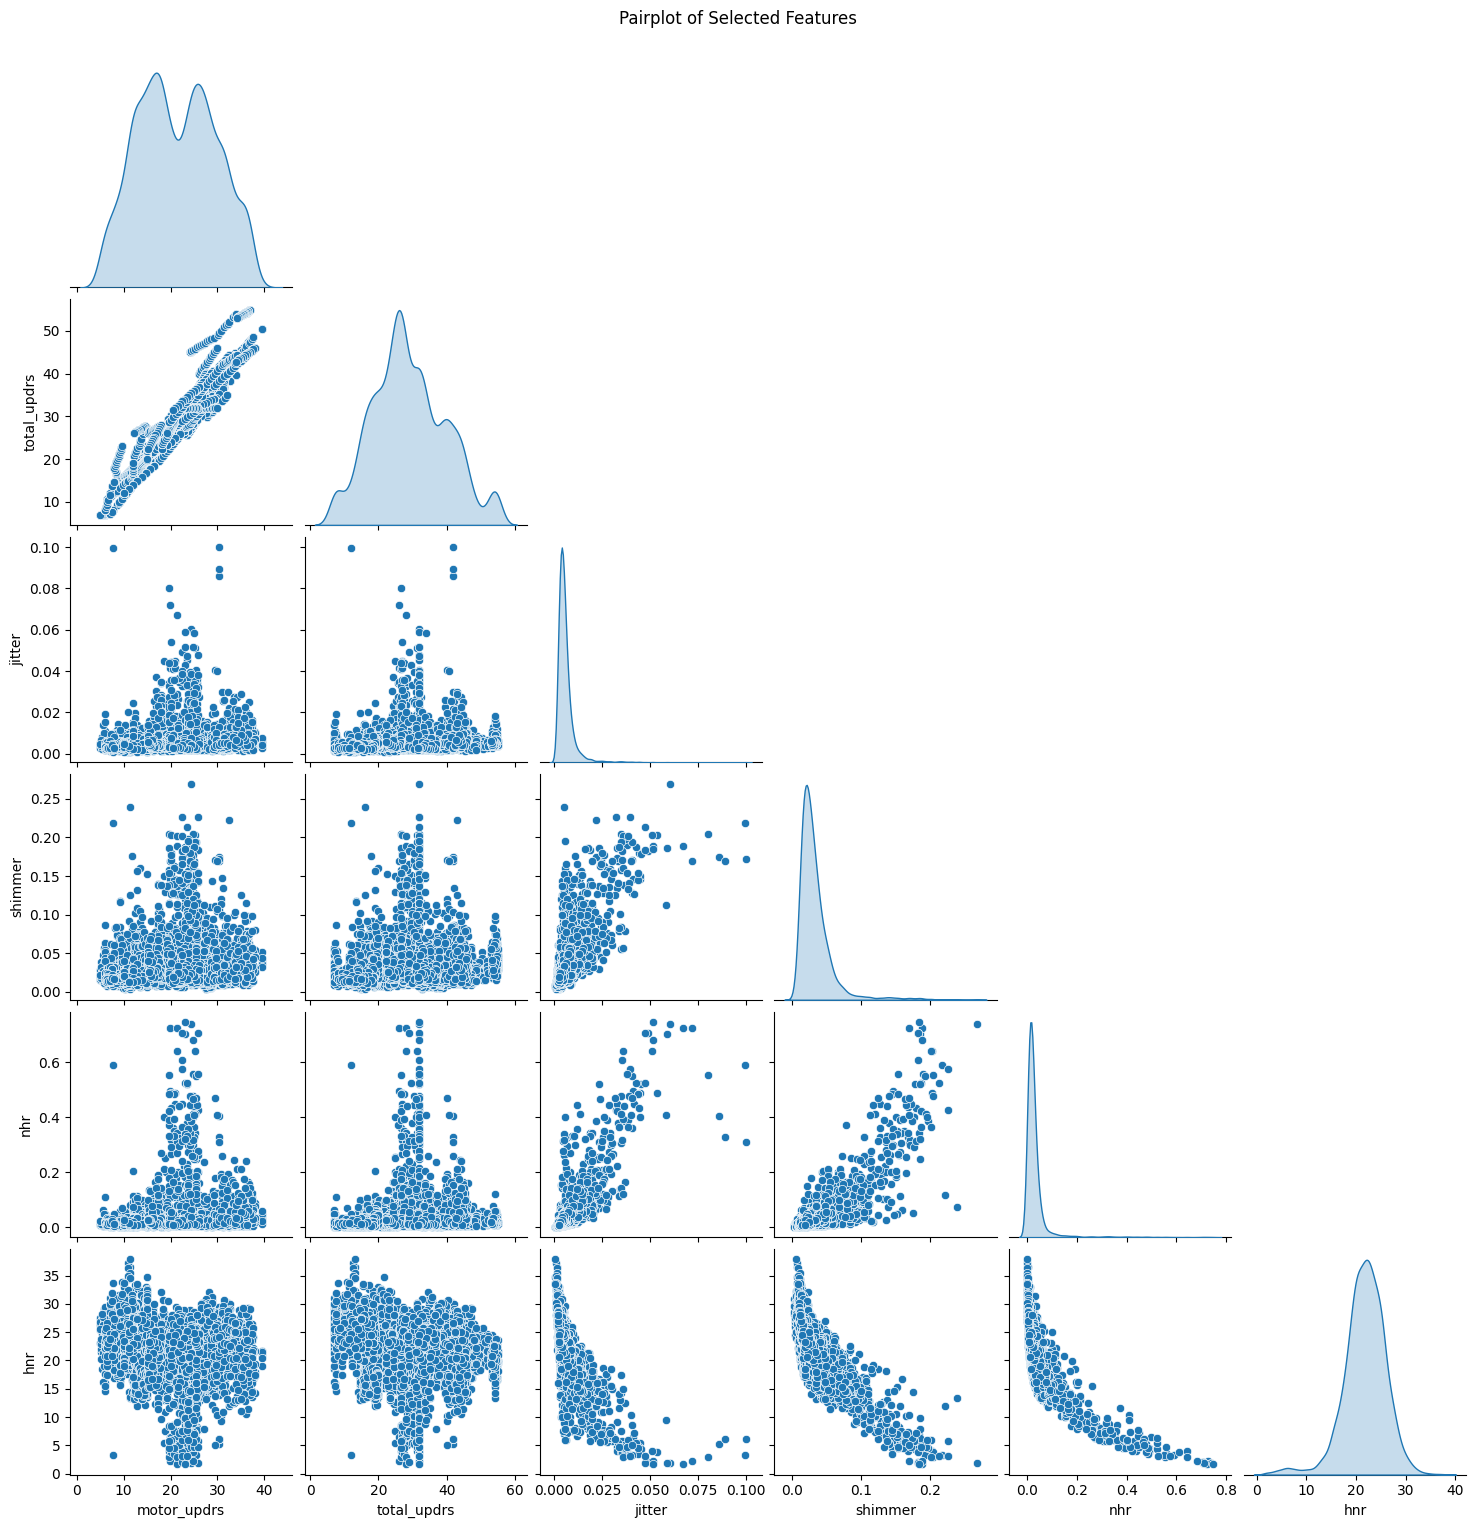

In [24]:
# Pairplot of selected features
selected_features = ['motor_updrs', 'total_updrs', 'jitter', 'shimmer', 'nhr', 'hnr']
sns.pairplot(df[selected_features], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [38]:
df['test_time'].value_counts()

test_time
 0.495430    15
 1.019371    14
 0.758336    12
 0.624918    12
 0.627912    12
             ..
-0.861093     1
 1.152789     1
-1.449648     1
-1.580542     1
-1.187883     1
Name: count, Length: 2442, dtype: int64

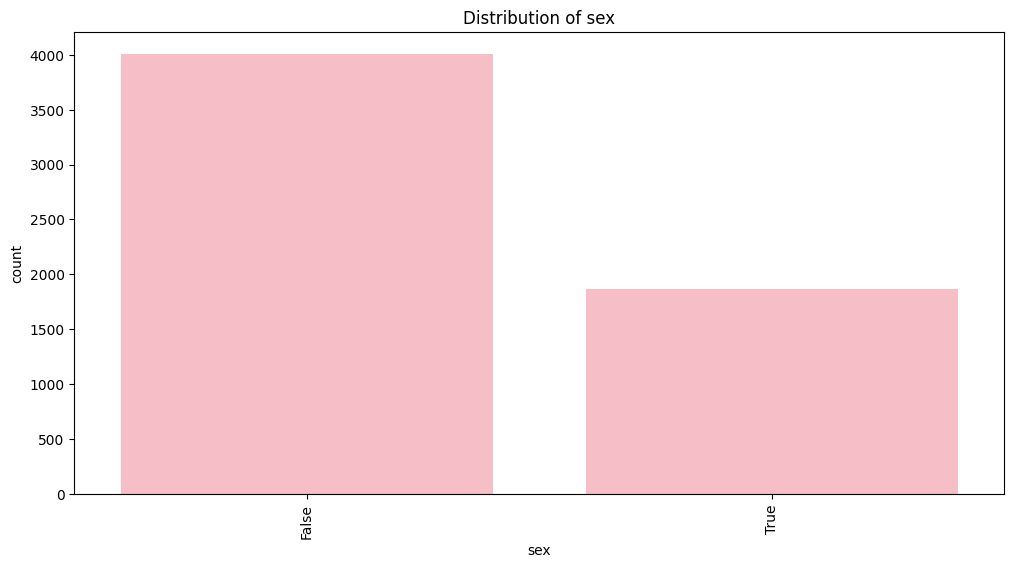

In [43]:
plt.figure(figsize=(12, 6))

sns.countplot(df, x='sex',color='LightPink')
plt.title('Distribution of sex')
plt.xticks(rotation=90)
plt.show()

In [39]:
df['sex'].value_counts()

sex
False    4008
True     1867
Name: count, dtype: int64

## <h2 style="text-align: center; color: #4c4cff;">👨‍💻 Outlier find out with box plots </h2>

In [27]:
# Get only numerical columns from the dataset
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numerical Columns:", numerical_columns)


Numerical Columns: Index(['subject', 'age', 'test_time', 'motor_updrs', 'total_updrs', 'jitter',
       'jitter_abs', 'jitter_rap', 'jitter_ppq5', 'jitter_ddp', 'shimmer',
       'shimmer_db', 'shimmer_apq3', 'shimmer_apq5', 'shimmer_apq11',
       'shimmer_dda', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe'],
      dtype='object')



Outliers in subject:
[]

Outliers in age:
[36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
 36 36 36 36 36]

Outliers in test_time:
[]

Outliers in motor_updrs:
[]

Outliers in total_updrs:
[]

Outliers in jitter:
[0.01597 0.01295 0.01286 0.01169 0.01994 0.0125  0.01245 0.01396 0.01399
 0.01169 0.01334 0.01507 0.01411 0.01191 0.01615 0.01191 0.01638 0.01214
 0.01341 0.01279 0.02376 0.07183 0.01692 0.04485 0.04465 0.02445 0.02234
 0.04132 0.04094 0.0416  0.01421 0.02634 0.01208 0.03414 0.02007 0.0124
 0.01302 0.01392 0.01432 0.01613 0.01499 0.02149 0.01282 0.01457 0.0122
 0.01209 0.01246 0.01243 0.03054 0.01888 0.03691 0.01891 0.01301 0.01213
 0.01253 0.02001 0.01163 0.01704 0.01392 0.012   0.01246 0.01165 0.01848
 0.01251 0.01414 0.01893 0.0186  

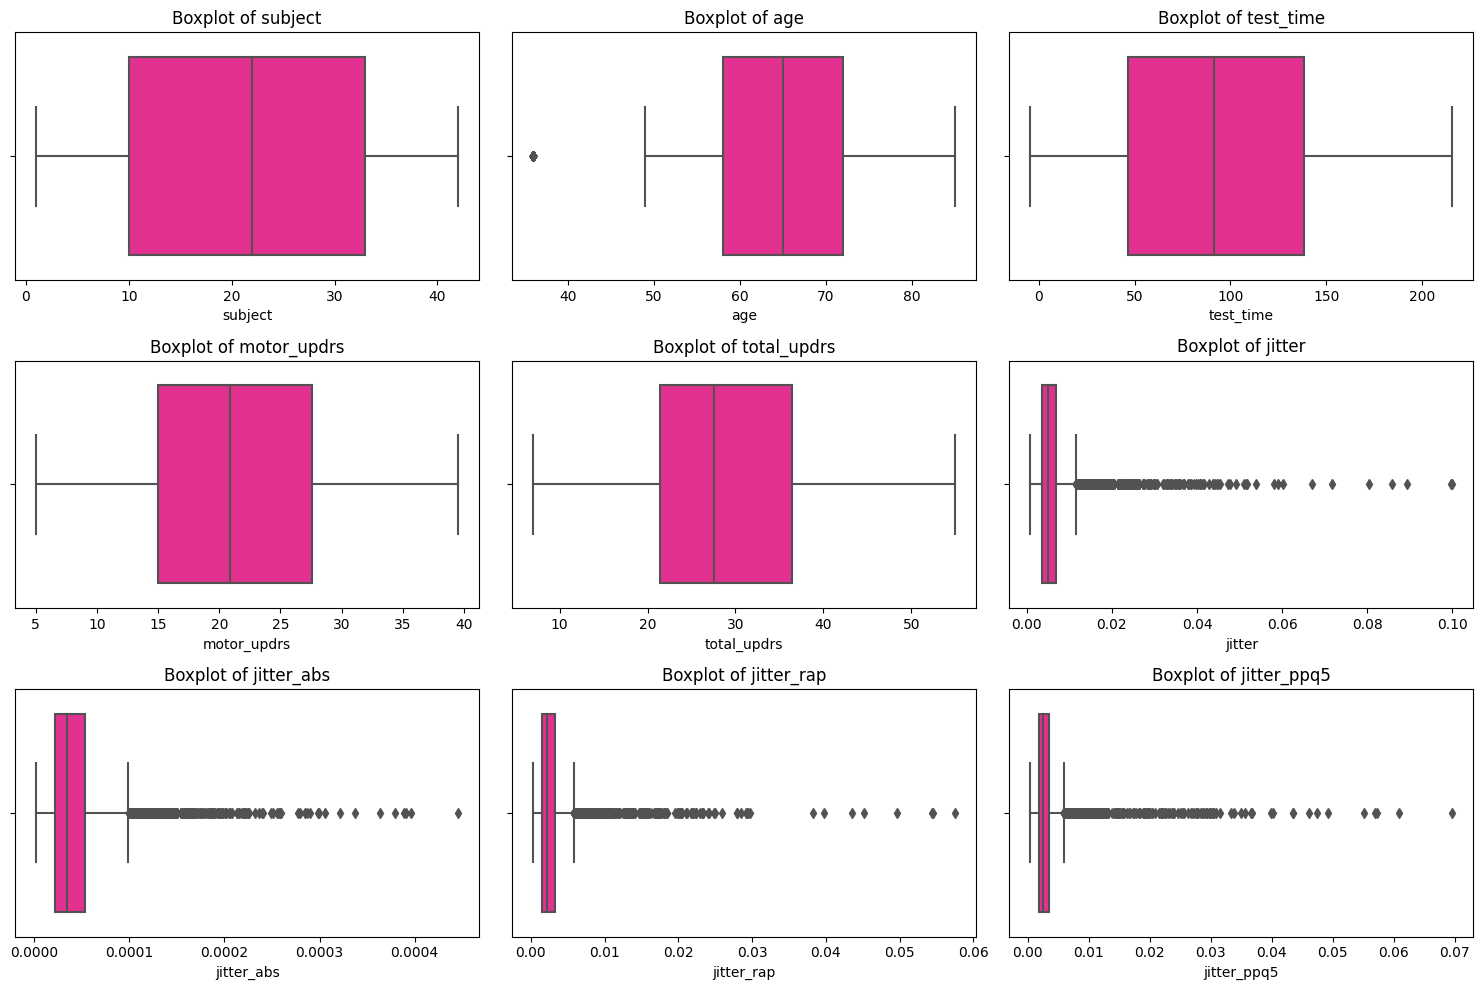


Outliers in jitter_ddp:
[0.0176  0.01771 0.02244 0.02266 0.01779 0.02194 0.02058 0.03886 0.01759
 0.02054 0.01774 0.02234 0.02466 0.02461 0.02013 0.02692 0.02346 0.01975
 0.02955 0.01893 0.01831 0.02726 0.02211 0.01886 0.02107 0.01923 0.0189
 0.04542 0.13068 0.02722 0.08399 0.08399 0.04484 0.01769 0.04029 0.06499
 0.0664  0.0744  0.01866 0.04762 0.01911 0.06088 0.03379 0.01956 0.01956
 0.0219  0.02214 0.0231  0.03574 0.01975 0.02438 0.01776 0.01912 0.02
 0.01985 0.05125 0.03234 0.06709 0.03132 0.02222 0.01789 0.01846 0.01962
 0.03177 0.02697 0.0237  0.01882 0.03203 0.02118 0.02472 0.0192  0.02953
 0.03374 0.01768 0.01845 0.01823 0.01968 0.02491 0.01855 0.04155 0.03082
 0.01964 0.01764 0.02886 0.04226 0.02583 0.02458 0.03064 0.01846 0.02333
 0.02769 0.01804 0.02769 0.03191 0.04735 0.02338 0.02677 0.01912 0.02121
 0.0284  0.0188  0.02173 0.16352 0.0243  0.01869 0.03232 0.03762 0.02129
 0.02396 0.03009 0.04152 0.02515 0.0183  0.02107 0.06095 0.01959 0.02685
 0.03347 0.02086 0.05103 0.023

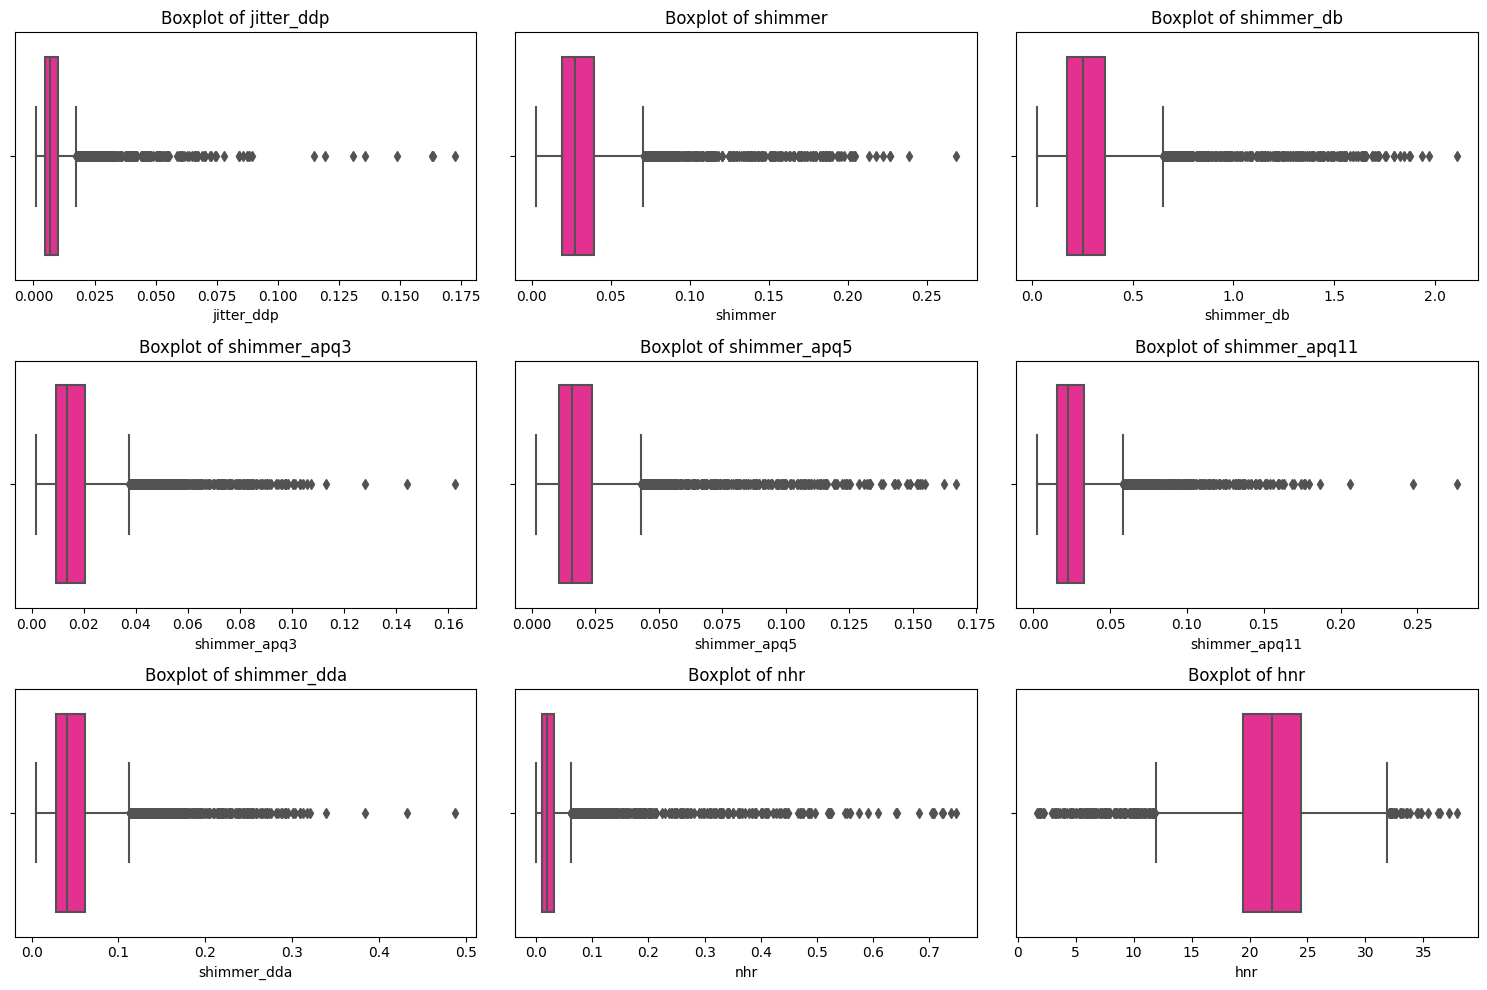


Outliers in rpde:
[0.96608 0.8307  0.24934 0.24663 0.20929 0.15102 0.21622 0.24933 0.20105
 0.24871 0.25075 0.23945 0.86563 0.90894 0.88634 0.88808 0.93507 0.84926
 0.87931 0.92236 0.92615 0.94792 0.83148 0.91559 0.86912 0.88661]

Outliers in dfa:
[]

Outliers in ppe:
[0.48156 0.486   0.42806 0.43811 0.43609 0.427   0.60333 0.59589 0.64669
 0.43935 0.46336 0.46529 0.44589 0.46615 0.55243 0.45869 0.45746 0.43873
 0.42729 0.58282 0.50397 0.64991 0.46142 0.48826 0.44743 0.43013 0.43929
 0.44057 0.46049 0.43977 0.43147 0.43427 0.49725 0.43261 0.45734 0.45455
 0.44628 0.5205  0.43528 0.45606 0.42856 0.45473 0.6779  0.45527 0.44553
 0.54762 0.50459 0.52487 0.47024 0.43045 0.56145 0.44606 0.45402 0.49157
 0.47226 0.45899 0.46136 0.43619 0.47043 0.48866 0.4447  0.4475  0.53421
 0.44171 0.46415 0.45995 0.4715  0.44528 0.46233 0.6189  0.47324 0.43727
 0.47804 0.51633 0.51016 0.48114 0.4317  0.51225 0.44841 0.73152 0.69056
 0.73173 0.46737 0.4467  0.45031 0.44477 0.4513  0.52685 0.44585 0.433
 0

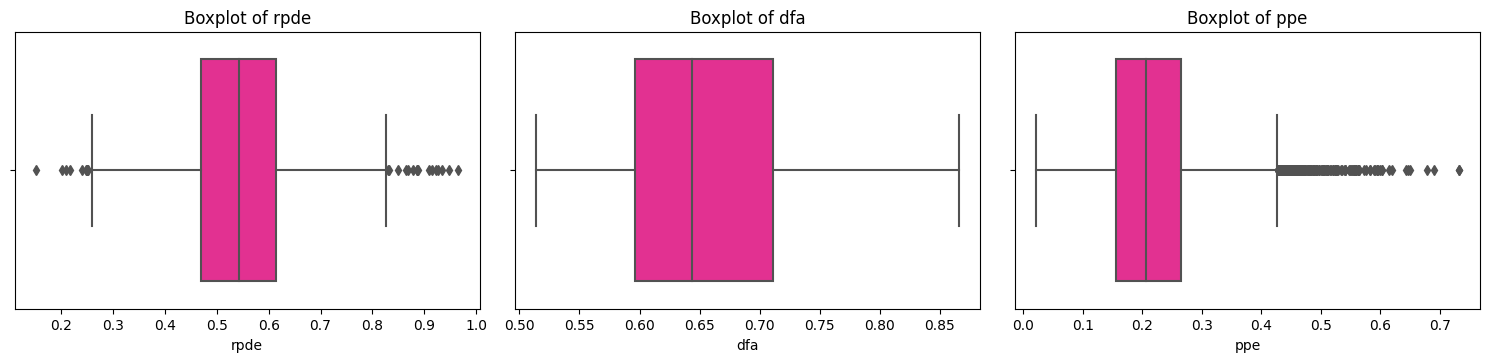

In [35]:
import numpy as np

# Function to detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# List of numerical features to check for outliers
numerical_features = ['subject', 'age', 'test_time', 'motor_updrs', 'total_updrs', 'jitter',
       'jitter_abs', 'jitter_rap', 'jitter_ppq5', 'jitter_ddp', 'shimmer',
       'shimmer_db', 'shimmer_apq3', 'shimmer_apq5', 'shimmer_apq11',
       'shimmer_dda', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe']

# Plot box plots for each feature and detect outliers
# Split features into batches of size 9
batch_size = 9
for batch_start in range(0, len(numerical_features), batch_size):
    batch_features = numerical_features[batch_start:batch_start + batch_size]

    # Create boxplots for the current batch
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(batch_features, 1):
        plt.subplot(3, 3, i)  # 3x3 grid
        sns.boxplot(x=df[column], color='DeepPink')
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)

        # Detect and display outliers
        outliers = detect_outliers(df, column)
        print(f"\nOutliers in {column}:\n{outliers[column].values}")

    plt.tight_layout()
    plt.show()



## <h2 style="text-align: center; color: #4c4cff;">👨‍💻 Outlier Remove</h2>

In [32]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep only the rows within the bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numerical features to process
numerical_features = ['subject', 'age', 'test_time', 'motor_updrs', 'total_updrs', 'jitter',
                      'jitter_abs', 'jitter_rap', 'jitter_ppq5', 'jitter_ddp', 'shimmer',
                      'shimmer_db', 'shimmer_apq3', 'shimmer_apq5', 'shimmer_apq11',
                      'shimmer_dda', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe']

# Remove outliers from each numerical feature
df_cleaned = df.copy()  # Create a copy to preserve the original data
for column in numerical_features:
    df_cleaned = remove_outliers(df_cleaned, column)

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")


Original dataset shape: (5875, 22)
Cleaned dataset shape: (4424, 22)


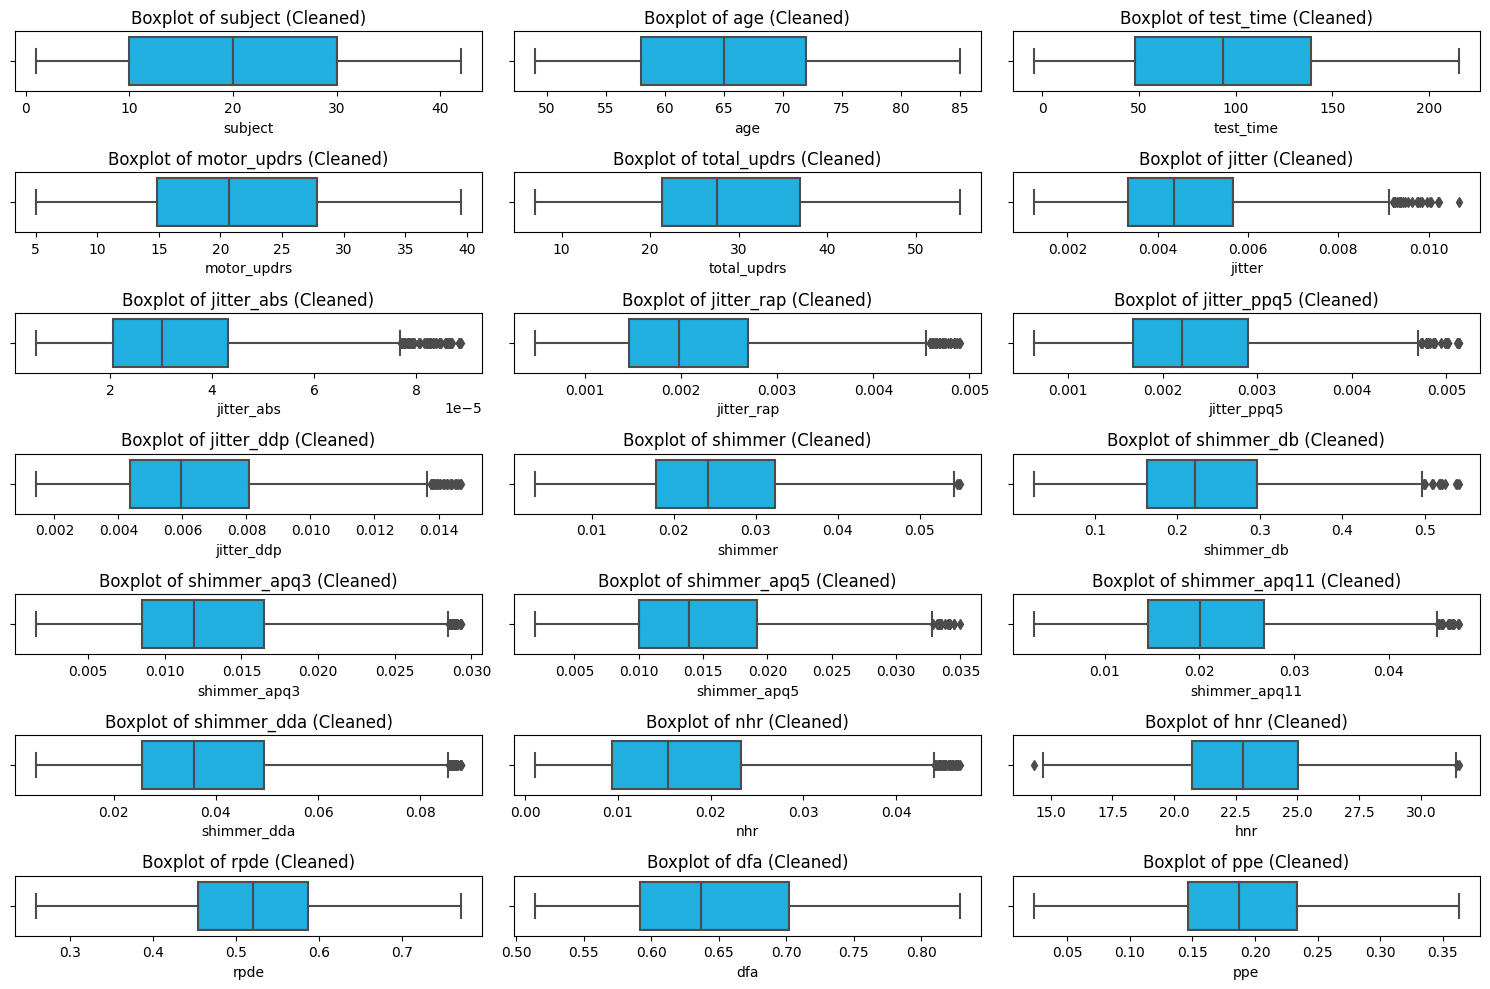

In [34]:
# Re-plot boxplots for cleaned data
plt.figure(figsize=(15, 10))
rows = int(np.ceil(len(numerical_features) / 3))  # Dynamically adjust rows
for i, column in enumerate(numerical_features, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=df_cleaned[column], color='DeepSkyBlue')
    plt.title(f'Boxplot of {column} (Cleaned)')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


## <h2 style="text-align: center; color: #4c4cff;">👨‍💻 Regression model</h2>

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = ['subject', 'age', 'test_time', 'motor_updrs', 'total_updrs', 'jitter',
                      'jitter_abs', 'jitter_rap', 'jitter_ppq5', 'jitter_ddp', 'shimmer',
                      'shimmer_db', 'shimmer_apq3', 'shimmer_apq5', 'shimmer_apq11',
                      'shimmer_dda', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe']

df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [47]:

from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'sex' column
df['sex'] = label_encoder.fit_transform(df['sex'])




In [49]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['ppe'])
y = df['ppe']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'RMSE': rmse, 'MAE': mae, 'R^2': r2}


In [51]:
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = evaluate_model(y_test, y_pred)
    print(f"{model_name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    return metrics


In [52]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_metrics = train_and_evaluate(linear_model, "Linear Regression")


Linear Regression Performance:
RMSE: 0.4975
MAE: 0.3608
R^2: 0.7452


In [53]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_metrics = train_and_evaluate(rf_model, "Random Forest Regressor")


Random Forest Regressor Performance:
RMSE: 0.3883
MAE: 0.2816
R^2: 0.8448


In [54]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_metrics = train_and_evaluate(xgb_model, "XGBoost Regressor")


XGBoost Regressor Performance:
RMSE: 0.3882
MAE: 0.2845
R^2: 0.8449


In [55]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(random_state=42, n_estimators=100)
lgbm_metrics = train_and_evaluate(lgbm_model, "LightGBM Regressor")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4661
[LightGBM] [Info] Number of data points in the train set: 4700, number of used features: 22
[LightGBM] [Info] Start training from score 0.005280
LightGBM Regressor Performance:
RMSE: 0.3729
MAE: 0.2745
R^2: 0.8568


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define neural network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile and train
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate
y_pred_nn = nn_model.predict(X_test_scaled).flatten()
nn_metrics = evaluate_model(y_test, y_pred_nn)
print("Neural Network Performance:")
for metric, value in nn_metrics.items():
    print(f"{metric}: {value:.4f}")


Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3918 - mae: 0.4503 - val_loss: 0.2120 - val_mae: 0.3469
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2007 - mae: 0.3291 - val_loss: 0.1918 - val_mae: 0.3243
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1853 - mae: 0.3136 - val_loss: 0.1898 - val_mae: 0.3217
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1708 - mae: 0.3058 - val_loss: 0.1766 - val_mae: 0.3105
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1643 - mae: 0.3003 - val_loss: 0.1713 - val_mae: 0.3038
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1442 - mae: 0.2815 - val_loss: 0.1702 - val_mae: 0.3058
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1433 - mae: 0.2784 - val_loss: 0.1580 - val_mae: 0.2975
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1364 - mae: 0.2760 - val_loss: 0.1570 - val_mae: 0.2964
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

In [57]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost", "LightGBM", "Neural Network"],
    "RMSE": [linear_metrics['RMSE'], rf_metrics['RMSE'], xgb_metrics['RMSE'], lgbm_metrics['RMSE'], nn_metrics['RMSE']],
    "MAE": [linear_metrics['MAE'], rf_metrics['MAE'], xgb_metrics['MAE'], lgbm_metrics['MAE'], nn_metrics['MAE']],
    "R^2": [linear_metrics['R^2'], rf_metrics['R^2'], xgb_metrics['R^2'], lgbm_metrics['R^2'], nn_metrics['R^2']]
})

print(results)


               Model      RMSE       MAE       R^2
0  Linear Regression  0.497531  0.360811  0.745216
1      Random Forest  0.388348  0.281635  0.844771
2            XGBoost  0.388153  0.284479  0.844926
3           LightGBM  0.372942  0.274549  0.856843
4     Neural Network  0.370747  0.279102  0.858523


In [64]:
df['sex_encoded'].value_counts()

sex_encoded
0    4008
1    1867
Name: count, dtype: int64

## <h2 style="text-align: center; color: #4c4cff;">👨‍💻 Classification model</h2>

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    roc_curve,
    average_precision_score,
    cohen_kappa_score
)


In [73]:
X = df.drop(['subject', 'sex'], axis=1)
y = df['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "Naive Bayes (Bernoulli)": BernoulliNB(),
    "SVM (Linear)": SVC(kernel='linear'),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "MLP Classifier": MLPClassifier()
}


In [83]:
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = evaluate_model(y_test, y_pred)
    print(f"{model_name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    return metrics

def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted'),
        'ROC AUC Score': roc_auc_score(y_true, y_pred, multi_class='ovr', average='weighted'),
        'Confusion Matrix': confusion_matrix(y_true, y_pred),
        'Classification Report': classification_report(y_true, y_pred)
    }


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

def plot_model_performance(model, model_name, X_test, y_test):
    plt.figure(figsize=(15, 5))
    
    # ROC curve
    plot_roc_curve(model, X_test, y_test)
    plt.title(f"ROC Curve - {model_name}")
    plt.show()

    # Precision-Recall curve
    plot_precision_recall_curve(model, X_test, y_test)
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.show()

# Plot performance for each model
for model_name, model in models.items():
    plot_model_performance(model, model_name, X_test, y_test)


In [ ]:
from joblib import dump, load

# Save the best model
best_model_name = "Random Forest"  # Example model
best_model = models[best_model_name]
dump(best_model, 'best_model.joblib')
